### **Importações**

In [25]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
#Importação do dataset de treino
file_path = r'Treino.csv'
df_treino = pd.read_csv(file_path)
display(df_treino.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,1,1,1,-1,-1,-1,-1,1,1
1,1,1,1,1,-1,-1,-1,0,0,1
2,1,1,1,1,-1,-1,0,-1,0,1
3,1,1,1,1,-1,-1,0,0,-1,1
4,1,1,1,1,-1,0,-1,0,-1,1


In [3]:
# Importação dos dataset de validacao e teste
file_path = r'Validacao.csv'
df_validacao = pd.read_csv(file_path)
df_validacao = df_validacao.astype(int)
display(df_validacao.head())

file_path = r'Teste.csv'
df_teste = pd.read_csv(file_path)
df_teste = df_teste.astype(int)
display(df_teste.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,0,0,1,-1,0,1,-1,0,1
1,1,1,1,-1,0,1,-1,-1,0,1
2,1,-1,0,-1,1,0,1,-1,1,1
3,-1,1,-1,-1,1,1,0,1,0,1
4,1,0,-1,-1,0,-1,1,1,1,1


,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,-1,-1,1,0,1,-1,1,1,0,1
1,1,-1,0,-1,1,-1,0,1,1,1
2,-1,-1,1,0,1,1,1,-1,0,1
3,1,-1,0,1,1,0,1,-1,-1,1
4,1,0,1,-1,1,0,-1,-1,1,1


In [11]:
df_treino.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,0.026706,0.041543,0.033630,0.033630,0.010880,0.065282,0.037587,0.037587,0.023739,0.100890
std,0.919685,0.857267,0.828249,0.819839,0.850673,0.810630,0.841128,0.811167,0.838097,0.908545
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [14]:
df_treino['Resultado'].value_counts()

Resultado
 1    320
-1    320
 0    320
 2     51
Name: count, dtype: int64

In [12]:
df_validacao.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.110236,0.055118,-0.047244,0.015748,0.070866,0.055118,0.039370,0.070866,-0.015748,0.110236
std,0.944729,0.857341,0.907275,0.863587,0.856174,0.848033,0.800809,0.808498,0.826008,0.919181
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [15]:
df_validacao['Resultado'].value_counts()

Resultado
 1    40
-1    40
 0    40
 2     7
Name: count, dtype: int64

In [13]:
df_teste.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.007937,0.079365,0.039683,0.071429,0.063492,0.071429,-0.023810,0.023810,-0.015873,0.095238
std,0.933775,0.844779,0.880007,0.811700,0.846130,0.771270,0.833924,0.763825,0.829305,0.907115
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [16]:
df_validacao['Resultado'].value_counts()

Resultado
 1    40
-1    40
 0    40
 2     7
Name: count, dtype: int64

#### **Treino**

In [17]:
# Filtrando as features que serão passadas para predição
X = df_treino.drop(columns=['Resultado'])
X

,J1,J2,J3,J4,J5,J6,J7,J8,J9
0,1,1,1,1,-1,-1,-1,-1,1
1,1,1,1,1,-1,-1,-1,0,0
2,1,1,1,1,-1,-1,0,-1,0
3,1,1,1,1,-1,-1,0,0,-1
4,1,1,1,1,-1,0,-1,0,-1
...,...,...,...,...,...,...,...,...,...
1006,1,0,0,0,0,1,-1,0,0
1007,0,0,1,0,1,-1,0,0,0
1008,1,1,-1,1,-1,0,0,0,0
1009,1,1,0,0,0,1,-1,-1,0


In [18]:
# Obtendo as labels do dataset de treino
Y = df_treino.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

##### **Uso de heurística para determinar o K**

**Regra da Raiz Quadrada**

In [19]:
from math import sqrt,ceil

# Arrendondando a raiz quadrada do total de entradas do dataset de treino

k = ceil(sqrt(df_treino['J1'].count())) 
print("Quantidade vizinhos: {}".format(k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Quantidade vizinhos: 32
K=32, Acurácia média: 0.5085743549724431


**Definição a partir do tamanho do dataset**

In [ ]:
qtd_amostras = df_treino['J1'].count()
k = ceil(0.02 * qtd_amostras)  # 2% do número total de amostras
print("Tamanho do dataset: {}\nValor K: {}".format(qtd_amostras,k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Tamanho do dataset: 1011
Valor K: 21
K=21, Acurácia média: 0.5412134809540068


**Cross-Validation**

In [23]:
# Lista para guardar os resultados dos testes para k
lista_k_accuracy = []

# Criação do classificador
for k in range(1,21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    # Treino do modelo
    clf.fit(X.values, Y)

    score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
    lista_k_accuracy.append([k,score.mean()])

In [44]:
# Tranformando a lista de acurácias em um array 20x2
array_acuracia = np.array(lista_k_accuracy)

# Obtendo o k a partir da maior acurácia continda na segunda coluna da matriz
k = np.argmax(array_acuracia[:, 1])

# Obtendo o valor da acurácia na posição do k
accuracia = array_acuracia[k][1]

print("K={}, Acurácia média: {}".format(k,accuracia))

K=4, Acurácia média: 0.6024679315222162


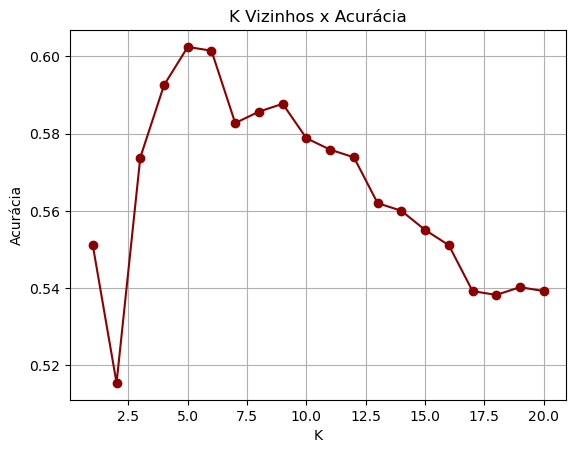

In [32]:
# Separando em listas separadas para o eixo x e y
x = [par[0] for par in lista_k_accuracy]
y = [par[1] for par in lista_k_accuracy]

# Plotar o gráfico de linha
plt.plot(x, y, marker='o',color='darkred') 

# Adicionar título e rótulos
plt.title('K Vizinhos x Acurácia')
plt.xlabel('K')
plt.ylabel('Acurácia')

# Mostrar o gráfico
plt.grid(True)
plt.show()


In [45]:
# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

KNeighborsClassifier(n_neighbors=4)

#### **Validação**

In [47]:
# Filtrando as features que serão passadas para predição
X_valid = df_validacao.drop(columns=['Resultado'])
X_valid = X_valid.values
X_valid

array([[ 1,  0,  0, ...,  1, -1,  0],
       [ 1,  1,  1, ..., -1, -1,  0],
       [ 1, -1,  0, ...,  1, -1,  1],
       ...,
       [ 1,  0, -1, ...,  0,  1,  0],
       [ 0, -1,  0, ...,  1,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [48]:
# Obtendo as labels do dataset de validação
Y_valid = df_validacao.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_valid

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [49]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_valid)

# Calculando a acurácia
acuracia = accuracy_score(Y_valid, predicao)
print("Acurácia: {:.2f}".format(acuracia))


Acurácia: 0.72


#### **Teste**

In [50]:
# Filtrando as features que serão passadas para predição
X_test = df_teste.drop(columns=['Resultado'])
X_test = X_test.values
X_test

array([[-1, -1,  1, ...,  1,  1,  0],
       [ 1, -1,  0, ...,  0,  1,  1],
       [-1, -1,  1, ...,  1, -1,  0],
       ...,
       [ 0,  0,  1, ...,  0, -1,  1],
       [ 0, -1,  0, ...,  0,  1,  1],
       [ 1,  0,  0, ...,  0, -1,  0]])

In [51]:
# Obtendo as labels do dataset de teste
Y_test = df_teste.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [52]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_test)

# Calculando a acurácia
acuracia = accuracy_score(Y_test, predicao)
print("Acurácia: {:.2f}".format(acuracia))

Acurácia: 0.77


In [53]:
# Nomes das classes
nomes_classes = ["O ganhou","Empate","X ganhou","Ainda tem jogo"]

# Calcular e imprimir o relatório de classificação
relatorio_classificacao = classification_report(Y_test, predicao, target_names=nomes_classes)
print("Relatório de Classificação:\n", relatorio_classificacao)

Relatório de Classificação:
                 precision    recall  f1-score   support

      O ganhou       0.71      0.97      0.82        40
        Empate       0.90      0.45      0.60        40
      X ganhou       0.78      0.97      0.87        40
Ainda tem jogo       1.00      0.17      0.29         6

      accuracy                           0.77       126
     macro avg       0.85      0.64      0.64       126
  weighted avg       0.81      0.77      0.74       126



### **Partida**

In [54]:
import numpy as np
import random

### **Função para plotagem do tabuleiro**

In [55]:
import matplotlib.pyplot as plt

def plot_board(board,predicao=None):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if predicao is not None:
        plt.text(1.5, -0.5, 'Status: ' + predicao, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


##### **Funções para realização de jogadas**

In [81]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada,linha,coluna):
    
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    print("Linha:",linha)
    print("Linha:",coluna)
        
    # Verificar se o valor na posição especificada é igual a zero
    if jogada[linha-1][coluna-1] == 0:
        return True
    
    return False
    

# Função para realização da jogada do computador a partir de uma função aleatória
def jogada_COM(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índices de linha e coluna na lista
        linha = random.randint(0,2)
        coluna = random.randint(0,2)

        # Caso a posição escolhida esteja livre realiza a modificação
        if jogada[linha][coluna] not in [1,-1]:
            # Atrubuição realizada na posição aleatória escolhida
            jogada[linha,coluna] = -1
            jogada_feita = True
        
    return jogada


def ajuste_jogada(jogada,linha,coluna):
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    # Substituindo o valor da posição informada em 1
    jogada[linha-1,coluna-1] = 1

    return jogada

#### **Realização da partida**

In [84]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)
# plot_board(jogada)

finalizar_jogo = False

print("=====================================\n")

while not finalizar_jogo:
    # Plotando o tabuleiro 
    # plot_board(jogada)
    print(np.array(jogada).reshape(3,3))
    
    # Limpando o prompt
    clear_output(wait=True)
    
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        print('Jogada realizada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada do usuário
    predicao = clf.predict(jogada)
    

    
    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)

    # PRINT PARA APAGAR DEPOIS
    print(np.array(jogada).reshape(3,3))
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[0]":
        finalizar_jogo = True
    
    jogada = jogada.reshape(3,3)
    # Realização de jogada da máquina
    jogada = jogada_COM(jogada)

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada da máquina
    predicao = clf.predict(jogada)

    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)

    # PRINT PARA APAGAR DEPOIS
    print(np.array(jogada).reshape(3,3))
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[0]":
        finalizar_jogo = True

    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)

Linha: 1
Linha: 2
Jogada realizada!
[[ 1  1  0]
 [ 0  0  0]
 [ 0  0 -1]]
Situação jogo: [0]

[[ 1  1  0]
 [ 0  0 -1]
 [ 0  0 -1]]
Situação jogo: [-1]

